In [107]:
%matplotlib inline
import numpy as np
import pandas as pd 
import os
import warnings
warnings.filterwarnings('ignore')

## Lecture et concaténation de tous les fichiers 

In [2]:
allfiles = os.listdir('./data/data valid/')
li = []

for file in allfiles : 
    print(file)
    file = './data/data valid/' + file 
    if file[-3:] == 'csv':
        data = pd.read_csv(file, header=0, sep=';')
        data['JOUR'] = pd.to_datetime(data['JOUR'])
        li.append(data)
    else:
        data = pd.read_csv(file, header=0, sep='\t')
        data['JOUR'] = pd.to_datetime(data['JOUR'])
        li.append(data)

dt = pd.concat(li, axis=0, ignore_index=True)

2015S2_NB_FER.csv
2018S1_NB_FER.txt
2017S2_NB_FER.txt
2016S2_NB_FER.txt
validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-semestre-2019.csv
2016S1_NB_FER.txt
2017S1_NB_FER.txt
2015S1_NB_FER.csv


## Modification des types 

In [3]:
dt.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2015-01-07,100,110,1,PORTE MAILLOT,71379,AMETHYSTE,241
1,2015-01-07,100,110,1,PORTE MAILLOT,71379,AUTRE TITRE,215
2,2015-01-07,100,110,1,PORTE MAILLOT,71379,FGT,518
3,2015-01-07,100,110,1,PORTE MAILLOT,71379,IMAGINE R,2556
4,2015-01-07,100,110,1,PORTE MAILLOT,71379,NAVIGO,14463


In [4]:
dt

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2015-01-07,100,110,1,PORTE MAILLOT,71379,AMETHYSTE,241
1,2015-01-07,100,110,1,PORTE MAILLOT,71379,AUTRE TITRE,215
2,2015-01-07,100,110,1,PORTE MAILLOT,71379,FGT,518
3,2015-01-07,100,110,1,PORTE MAILLOT,71379,IMAGINE R,2556
4,2015-01-07,100,110,1,PORTE MAILLOT,71379,NAVIGO,14463
...,...,...,...,...,...,...,...,...
6300964,2015-06-30,810,802,905,VILLEPINTE,73547,AUTRE TITRE,49
6300965,2015-06-30,810,802,905,VILLEPINTE,73547,FGT,279
6300966,2015-06-30,810,802,905,VILLEPINTE,73547,IMAGINE R,308
6300967,2015-06-30,810,802,905,VILLEPINTE,73547,NAVIGO,1388


#### 8% des données ont la valeur "moins de 5" 

In [5]:
dt.loc[dt['NB_VALD'] == 'Moins de 5'].shape[0]/dt.shape[0]*100

9.450435321932229

In [6]:
dt.loc[dt['NB_VALD'] == 'Moins de 5', 'NB_VALD'] = 5
dt['NB_VALD'] = pd.to_numeric(dt['NB_VALD'])

In [7]:
dt['JOUR'] = dt['JOUR'].astype(str)

In [8]:
dt.dtypes

JOUR               object
CODE_STIF_TRNS      int64
CODE_STIF_RES      object
CODE_STIF_ARRET    object
LIBELLE_ARRET      object
ID_REFA_LDA        object
CATEGORIE_TITRE    object
NB_VALD             int64
dtype: object

In [9]:
dt_agg = pd.DataFrame(dt.groupby(["JOUR","LIBELLE_ARRET"])['NB_VALD'].sum().reset_index())

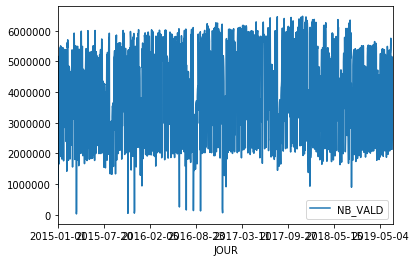

In [10]:
dt_agg.groupby('JOUR').sum().plot()

In [11]:
dt_agg

,JOUR,LIBELLE_ARRET,NB_VALD
0,2015-01-01,ABBESSES,750
1,2015-01-01,ABLON,118
2,2015-01-01,ACHERES-GRAND-CORMIER,18
3,2015-01-01,ACHERES-VILLE,482
4,2015-01-01,AEROPORT CHARLES DE GAULLE 1,1257
...,...,...,...
1026013,2019-06-30,VOLTAIRE (LEON BLUM),6306
1026014,2019-06-30,VOSVES,10
1026015,2019-06-30,VULAINES-SUR-SEINE-SAMOREAU,20
1026016,2019-06-30,WAGRAM,1840


In [13]:
dt_agg.to_csv('./data/validation_data_agg_2015_2019.csv')

## Merge positions

In [22]:
pos = pd.read_csv("positions-geographiques-des-stations-du-reseau-ratp.csv", sep=';')
dt2 = pos[['Name','Coordinates']].copy()

l = np.array(dt2["Coordinates"].str.split(",").tolist())
dt2["lon"] = l[:,0]
dt2["lat"] = l[:,1]
dt2.drop("Coordinates",axis=1, inplace=True)
#dt2["lon"] = dt2["lon"].str[0:6]
#dt2["lat"] = dt2["lat"].str[0:6]

#dt2.rename(columns={'Name':'LIBELLE_ARRET'}, inplace=True)
dt2['Name'] = dt2['Name'].str.lower()
dt2['Name'] = dt2['Name'].str.replace('[^\w]','')
dt2['Name'] = dt2['Name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

dt2['lon'] = pd.to_numeric(dt2["lon"])
dt2['lat'] = pd.to_numeric(dt2["lat"])

dt2 = dt2.groupby('Name').mean().reset_index()
dt2.drop_duplicates(inplace=True)

dt2.head()

,Name,lon,lat
0,11novembre,48.849993,2.395659
1,11novembre1918,48.824212,2.516243
2,11novembrecourcellesuryvetterer,48.700031,2.099321
3,12fevrier1934,48.817827,2.308055
4,17octobre1961,48.898062,2.216702


In [25]:
dt_agg['Name'] = dt_agg['LIBELLE_ARRET'].str.lower()
dt_agg['Name'] = dt_agg['Name'].str.replace('[^\w]','')
dt_agg['Name'] = dt_agg['Name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
dt_agg

,JOUR,LIBELLE_ARRET,NB_VALD,Name
0,2015-01-01,ABBESSES,750,abbesses
1,2015-01-01,ABLON,118,ablon
2,2015-01-01,ACHERES-GRAND-CORMIER,18,acheresgrandcormier
3,2015-01-01,ACHERES-VILLE,482,acheresville
4,2015-01-01,AEROPORT CHARLES DE GAULLE 1,1257,aeroportcharlesdegaulle1
...,...,...,...,...
1026013,2019-06-30,VOLTAIRE (LEON BLUM),6306,voltaireleonblum
1026014,2019-06-30,VOSVES,10,vosves
1026015,2019-06-30,VULAINES-SUR-SEINE-SAMOREAU,20,vulainessurseinesamoreau
1026016,2019-06-30,WAGRAM,1840,wagram


In [31]:
dt_agg_pos = dt_agg.merge(dt2, how='left', on='Name')
dt_agg_pos.drop('Name',axis=1,inplace=True)
dt_agg_pos.columns = ['date', 'libelle_arret','nb_valid','lon','lat']

dt_agg_pos


,date,libelle_arret,nb_valid,lon,lat
0,2015-01-01,ABBESSES,750,48.884505,2.338365
1,2015-01-01,ABLON,118,NaN,NaN
2,2015-01-01,ACHERES-GRAND-CORMIER,18,48.955388,2.092457
3,2015-01-01,ACHERES-VILLE,482,48.970248,2.077672
4,2015-01-01,AEROPORT CHARLES DE GAULLE 1,1257,49.010400,2.561357
...,...,...,...,...,...
1026013,2019-06-30,VOLTAIRE (LEON BLUM),6306,48.857966,2.380567
1026014,2019-06-30,VOSVES,10,NaN,NaN
1026015,2019-06-30,VULAINES-SUR-SEINE-SAMOREAU,20,NaN,NaN
1026016,2019-06-30,WAGRAM,1840,48.883712,2.305558


In [19]:
dt_agg_pos.to_csv('./data/data_merg_2015_2019.csv')

## Jours Fériés 

In [109]:
data_ferie = pd.read_csv("jours-feries.csv")
data_ferie.head()

,date,est_jour_ferie,nom_jour_ferie
0,1950-01-01,True,Jour de l'an
1,1950-01-02,False,NaN
2,1950-01-03,False,NaN
3,1950-01-04,False,NaN
4,1950-01-05,False,NaN


Ce jeu de données est une liste des jours fériés entre 1950 et 2050, avec le format suivant :
  - **date**: date, format YYYY-MM-DD. Exemple 1952-12-25.
  - **est_jour_ferie**: booléen, indique si cette date est un jour férié. Exemple : True
  - **nom_jour_ferie**: texte, si cette date est un jour férié, indique son nom. Exemple : Noël.

In [110]:
# Let's convert dates into datetime type
data_ferie['date'] = pd.to_datetime(data_ferie['date'],format="%Y/%m/%d")
# Let's keep only dates between 2015-01-01 and 2019-06-30
data_ferie=data_ferie[data_ferie['date'].isin(pd.date_range(start='20150101', end='20190630'))]
# Let's replace NaN values by "jour non ferie"
data_ferie["nom_jour_ferie"].fillna("Jour non ferie", inplace = True) 


In [111]:
data_ferie.columns = ['date','est_jour_ferie','type_jour']
data_ferie.head()

,date,est_jour_ferie,type_jour
23741,2015-01-01,True,Jour de l'an
23742,2015-01-02,False,Jour non ferie
23743,2015-01-03,False,Jour non ferie
23744,2015-01-04,False,Jour non ferie
23745,2015-01-05,False,Jour non ferie


In [112]:
# Encoder la colonne 'est_jour_ferié' : True => 1 et False => 0
data_ferie.est_jour_ferie = data_ferie.est_jour_ferie.astype(int)
data_ferie.head()

,date,est_jour_ferie,type_jour
23741,2015-01-01,1,Jour de l'an
23742,2015-01-02,0,Jour non ferie
23743,2015-01-03,0,Jour non ferie
23744,2015-01-04,0,Jour non ferie
23745,2015-01-05,0,Jour non ferie


In [113]:
#Ajouter une nouvelle colonne "is_weekend" comme nouvelle donnée
data_ferie['is_weekend'] = data_ferie['date'].map(lambda x : 1 if x.weekday() >= 5 else 0 )
data_ferie.head()

In [115]:
#Ajouter le type "Weekend" pour la colonne "type_jour"
mask = (data_ferie['is_weekend'] == 1) 
data_ferie['type_jour'][mask] = "Weekend"
data_ferie.head()

In [117]:
data_ferie.drop('is_weekend',axis=1,inplace=True)
data_ferie.head()

,date,est_jour_ferie,type_jour
23741,2015-01-01,1,Jour de l'an
23742,2015-01-02,0,Jour non ferie
23743,2015-01-03,0,Weekend
23744,2015-01-04,0,Weekend
23745,2015-01-05,0,Jour non ferie


In [118]:
data_ferie['type_jour'].unique()

array(["Jour de l'an", 'Jour non ferie', 'Weekend', 'Lundi de Pâques',
       'Fête du travail', 'Victoire des alliés', 'Ascension',
       'Lundi de Pentecôte', 'Fête Nationale', 'Armistice', 'Noël',
       'Assomption', 'Toussaint'], dtype=object)

In [119]:
data_ferie.isnull().sum()

date              0
est_jour_ferie    0
type_jour         0
dtype: int64

### Merge data

In [120]:
dt_agg_pos['date'] = pd.to_datetime(dt_agg_pos['date'],format="%Y/%m/%d")
df_merged = pd.merge(dt_agg_pos, data_ferie, on='date', how='outer')

In [121]:
df_merged['date'] = pd.to_datetime(df_merged['date'],format="%Y/%m/%d")
df_merged.head()

,date,libelle_arret,nb_valid,lon,lat,est_jour_ferie,type_jour
0,2015-01-01,ABBESSES,750.0,48.884505,2.338365,1,Jour de l'an
1,2015-01-01,ABLON,118.0,NaN,NaN,1,Jour de l'an
2,2015-01-01,ACHERES-GRAND-CORMIER,18.0,48.955388,2.092457,1,Jour de l'an
3,2015-01-01,ACHERES-VILLE,482.0,48.970248,2.077672,1,Jour de l'an
4,2015-01-01,AEROPORT CHARLES DE GAULLE 1,1257.0,49.010400,2.561357,1,Jour de l'an


In [122]:
# Let's sort the data by date
df_merged=df_merged.sort_values(by='date')
df_merged

,date,libelle_arret,nb_valid,lon,lat,est_jour_ferie,type_jour
0,2015-01-01,ABBESSES,750.0,48.884505,2.338365,1,Jour de l'an
474,2015-01-01,ORANGIS-BOIS DE L'EPINE,413.0,NaN,NaN,1,Jour de l'an
475,2015-01-01,ORGERUS-BEHOUST,33.0,NaN,NaN,1,Jour de l'an
476,2015-01-01,ORLY VILLE,398.0,NaN,NaN,1,Jour de l'an
477,2015-01-01,ORSAY-VILLE,360.0,48.697602,2.182080,1,Jour de l'an
...,...,...,...,...,...,...,...
1025637,2019-06-30,LA DEFENSE-GRANDE ARCHE,26424.0,48.891916,2.237488,0,Weekend
1025638,2019-06-30,LA FERTE-ALAIS,84.0,NaN,NaN,0,Weekend
1025639,2019-06-30,LA FERTE-SOUS-JOUARRE,535.0,NaN,NaN,0,Weekend
1025641,2019-06-30,LA FRETTE-MONTIGNY,226.0,NaN,NaN,0,Weekend


In [123]:
df_merged.to_csv('./data/data_merged_new_draft_2015_2019.csv')